# Notebook para experimentar con representación de los datos del Minsal respecto al Covid19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import calendar

#from matplotlib.ticker import NullFormatter  # useful for `logit` scale

### Se lee de archivo directamente de repositorio Git Hub

In [2]:


#url_resumen_nacional = "https://raw.githubusercontent.com/jorgeperezrojas/covid19-data/master/csv/resumen_nacional.csv"

data = pd.read_csv("../csv/resumen_nacional.csv")
#data = pd.read_csv(url_resumen_nacional)

#data_pacientes_en_uci = pd.read_csv("../csv/pacientes_en_uci.csv")

### Se ve que la carga sea correcta

In [3]:
data

,dia,confirmados,muertes
0,03/07/2020,7,0
1,03/08/2020,9,0
2,03/09/2020,12,0
3,03/10/2020,17,0
4,03/11/2020,23,0
...,...,...,...
86,06/01/2020,105159,1113
87,06/02/2020,108686,1113
88,06/03/2020,113628,1275
89,06/04/2020,118292,1356


Se guarda el nro de lineas

In [4]:
#data.describe()
n = data["dia"].count()-1
n

90

## Se imprime un resumen del día

In [5]:

print("Total de Confirmados ", data["dia"][n], " = ", data["confirmados"][n] )
print("Total de Fallecidos al ", data["dia"][n], " = ", data["muertes"][n])

confirmados_ultimas_24h = data["confirmados"][n] - data["confirmados"][n-1]
print("Confirmados ultimas 24h = ", confirmados_ultimas_24h )

muertes_ultimas_24h = data["muertes"][n] - data["muertes"][n-1]
print("Fallecidos ultimas 24h = ", muertes_ultimas_24h )



Total de Confirmados  06/06/2020  =  122499
Total de Fallecidos al  06/06/2020  =  1448
Confirmados ultimas 24h =  4207
Fallecidos ultimas 24h =  92


### Se agregan 2 columnas mas a un nuevo dataset con las diferencias diarias de Confirmados y Fallecidos

In [6]:
#df_nro_confirmados_dia = pd.DataFrame(dict(nro_confirmados_dia = data["confirmados"][1] - data["confirmados"][0]))

d = []

for i in range(0,n+1):
    if (i==0):
        diff_confirmados = 0
        diff_muertes = 0
        d.append((diff_confirmados,diff_muertes))
    else:
        diff_confirmados = data["confirmados"][i] - data["confirmados"][i-1]
        diff_muertes = data["muertes"][i] - data["muertes"][i-1]
        d.append((diff_confirmados,diff_muertes))
    
    
df = pd.DataFrame(d, columns=("Confirmados_ult_24h", "Fallecidos_ult_24h"))
#   print(i, "\n")
data2 = pd.concat([data,df], axis=1)

data2
#nro_confirmados_dia

,dia,confirmados,muertes,Confirmados_ult_24h,Fallecidos_ult_24h
0,03/07/2020,7,0,0,0
1,03/08/2020,9,0,2,0
2,03/09/2020,12,0,3,0
3,03/10/2020,17,0,5,0
4,03/11/2020,23,0,6,0
...,...,...,...,...,...
86,06/01/2020,105159,1113,5471,59
87,06/02/2020,108686,1113,3527,0
88,06/03/2020,113628,1275,4942,162
89,06/04/2020,118292,1356,4664,81


In [7]:
data2.describe()

,confirmados,muertes,Confirmados_ult_24h,Fallecidos_ult_24h
count,91.000000,91.000000,91.000000,91.000000
mean,25775.032967,279.824176,1346.065934,15.912088
std,33124.554894,355.779195,1592.309733,24.633152
min,7.000000,0.000000,0.000000,0.000000
25%,2294.000000,7.500000,291.000000,1.000000
50%,10832.000000,147.000000,478.000000,8.000000
75%,35710.500000,357.000000,2082.000000,16.500000
max,122499.000000,1448.000000,5471.000000,162.000000


In [8]:
data=[]   ## Libero memoria


### Se grafican todas las columnas del nuevo dataset

In [9]:
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(6)+1]
#dias

np.arange(0, n, step=20)

array([ 0, 20, 40, 60, 80])

## Para graficar los datos respecto a evolución de Casos Confirmados y de las Últimas 24 Horas

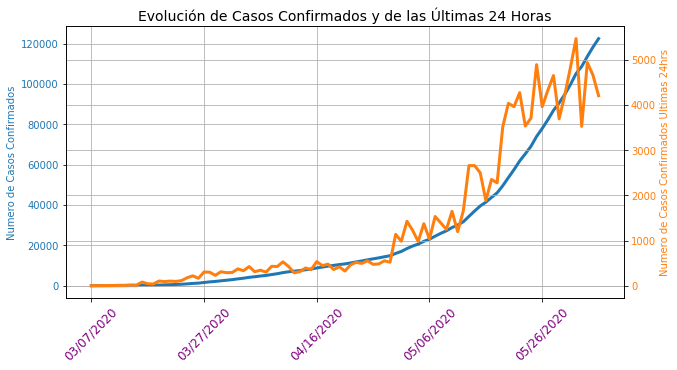

In [10]:
#data.plot(kind="line", x="dia" , y= ["confirmados", "muertes"], figsize = (10,5), fontsize=20 )
#plt.figure(figsize= [100000, 100000])

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'

plt.title("Evolución de Casos Confirmados y de las Últimas 24 Horas", fontsize=14)
ax1.set_ylabel('Numero de Casos Confirmados', color=color)
ax1.plot(data2["confirmados"], color=color, linewidth=3, label="Hola")
plt.grid(True)
ax1.tick_params(axis='y', labelcolor=color)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]# Para generar el lugar del primer días de cada mes en un año
dias=np.arange(0, n, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80]]
plt.xticks( dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
#data2.plot(x="dia",y=["confirmados"], figsize=(10,10), linewidth=5 )

ax2.set_ylabel('Numero de Casos Confirmados Ultimas 24hrs', color=color)  # we already handled the x-label with ax1
#ax2.plot(data2["dia"], data2["Confirmados_ult_24h"], label="Conf_ult_24h", data2["Fallecidos_ult_24h"], label="Fallec._ult_24h")
ax2.plot(data2["Confirmados_ult_24h"], color=color, linewidth=3)
plt.grid(True)
ax2.tick_params(axis='y', labelcolor=color)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
dias=np.arange(0, n, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione


#ig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()










## Para graficar los datos respecto a evolución de Casos de Fallecidos y de las Últimas 24 Horas

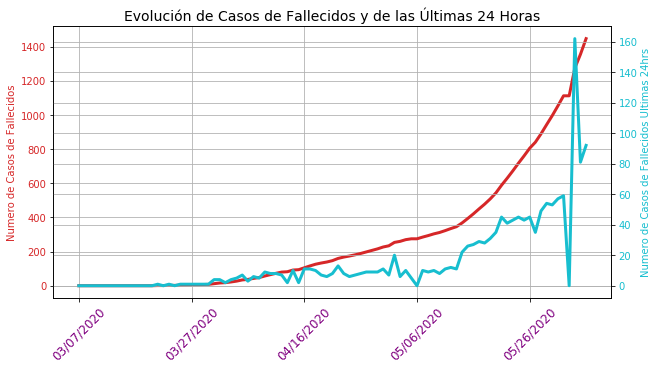

In [11]:
#data.plot(kind="line", x="dia" , y= ["confirmados", "muertes"], figsize = (10,5), fontsize=20 )
#plt.figure(figsize= [100000, 100000])

fig, ax3 = plt.subplots(figsize=(10, 5))

color = 'tab:red'

plt.title("Evolución de Casos de Fallecidos y de las Últimas 24 Horas", fontsize=14)
ax3.set_ylabel('Numero de Casos de Fallecidos', color=color)
ax3.plot(data2["muertes"], color=color, linewidth=3, label="Fallecidos")
plt.grid(True)
ax3.tick_params(axis='y', labelcolor=color)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]# Para generar el lugar del primer días de cada mes en un año
dias=np.arange(0, n, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80]]
plt.xticks( dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:cyan'
#data2.plot(x="dia",y=["confirmados"], figsize=(10,10), linewidth=5 )

ax4.set_ylabel('Numero de Casos de Fallecidos Ultimas 24hrs', color=color)  # we already handled the x-label with ax1
#ax2.plot(data2["dia"], data2["Confirmados_ult_24h"], label="Conf_ult_24h", data2["Fallecidos_ult_24h"], label="Fallec._ult_24h")
ax4.plot(data2["Fallecidos_ult_24h"], color=color, linewidth=3)
plt.grid(True)
ax4.tick_params(axis='y', labelcolor=color)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
dias=np.arange(0, n, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()










## Se grafican las columnas en forma separada

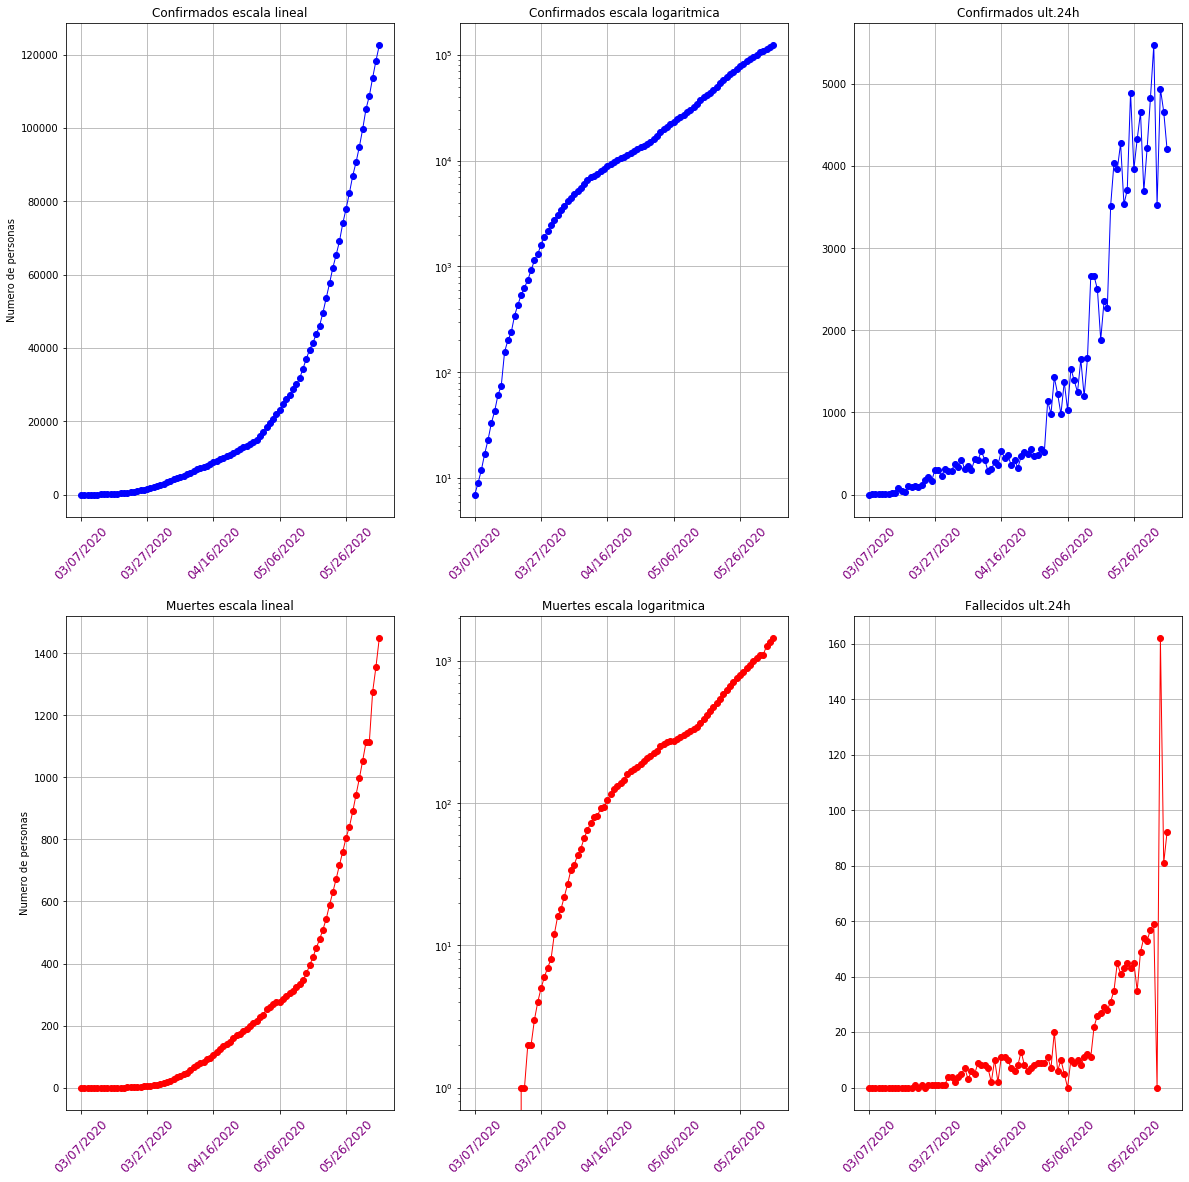

In [12]:
plt.figure(figsize= [20, 20])

#fig, ax = plt.subplots()

plt.subplot(231)
#data2.plot( x="dia", y="confirmados" )
plt.plot(data2["dia"], data2["confirmados"], 'bo-', linewidth=1)
plt.title('Confirmados escala lineal')
plt.grid(True)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
dias=np.arange(0, n, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione
#meses = ["Marzo", "Abril", "Mayo", "Junio"]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione
plt.ylabel("Numero de personas")

#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(range(start, end, 10))

plt.subplot(232)
#data2.plot( x="dia", y="confirmados" )
plt.plot(data2["dia"], data2["confirmados"], 'bo-', linewidth=1)
plt.yscale('log')
plt.title('Confirmados escala logaritmica')
plt.grid(True)
#plt.xticks(rotation=90)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
#meses = ["Marzo", "Abril", "Mayo", "Junio"]
dias=np.arange(0, n, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione


plt.subplot(233)
#data2.plot( x="dia", y="confirmados" )
plt.plot(data2["dia"], data2["Confirmados_ult_24h"], 'bo-', linewidth=1)
plt.title('Confirmados ult.24h')
plt.grid(True)
#plt.xticks(rotation=90)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
#meses = ["Marzo", "Abril", "Mayo", "Junio"]
dias=np.arange(0, n, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione


plt.subplot(234)
#data2.plot( x="dia", y="muertes" )
plt.plot(data2["dia"], data2["muertes"], 'ro-', linewidth=1 )
plt.title('Muertes escala lineal')
plt.grid(True)
#plt.xticks(rotation=90)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
#meses = ["Marzo", "Abril", "Mayo", "Junio"]
dias=np.arange(0, n, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione
plt.ylabel("Numero de personas")

plt.subplot(235)
#data2.plot( x="dia", y="muertes" )
plt.plot(data2["dia"], data2["muertes"], 'ro-', linewidth=1 )
plt.yscale('log')
plt.title('Muertes escala logaritmica')
plt.grid(True)
#plt.xticks(rotation=90)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
#meses = ["Marzo", "Abril", "Mayo", "Junio"]
dias=np.arange(0, n, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione


plt.subplot(236)
#data2.plot( x="dia", y="confirmados" )
#plt.bar(data2["dia"], data2["Fallecidos_ult_24h"], color="red")
plt.plot(data2["dia"], data2["Fallecidos_ult_24h"], 'ro-', linewidth=1 )
plt.title('Fallecidos ult.24h')
plt.grid(True)
#plt.xticks(rotation=90)
#dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(5)+1]  # Para generar el lugar del primer días de cada mes en un año
#meses = ["Marzo", "Abril", "Mayo", "Junio"]
dias=np.arange(0, n, step=20)
meses = [data2["dia"][0], data2["dia"][20], data2["dia"][40], data2["dia"][60], data2["dia"][80]]
plt.xticks(dias, meses, size = 'large', color = 'purple', rotation = 45)  # Colocamos las etiquetas, meses, en las posicione


# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
#plt.gca().yaxis.set_minor_formatter(NullFormatter())

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
#plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)

plt.show()



In [13]:
url_pacientes_en_uci = "https://raw.githubusercontent.com/jorgeperezrojas/covid19-data/master/csv/pacientes_en_uci.csv"
data3 = pd.read_csv(url_pacientes_en_uci)

In [14]:
data3

,codigo,region,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,...,05/29/2020,05/30/2020,05/31/2020,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020
0,15,Arica y Parinacota,0,0,0,0,2,4,4,5,...,11,12,12,11,11,11,11,12,12,11
1,1,Tarapacá,1,1,1,1,1,2,2,2,...,23,23,25,26,29,32,32,34,39,41
2,2,Antofagasta,3,4,3,3,3,3,2,2,...,54,52,48,51,53,54,54,46,49,51
3,3,Atacama,0,0,0,0,0,0,0,1,...,2,2,2,2,2,2,2,2,2,2
4,4,Coquimbo,1,1,1,2,1,1,2,1,...,12,10,11,11,10,9,10,11,11,10
5,5,Valparaíso,14,17,18,22,27,22,21,20,...,79,88,95,96,94,92,90,92,86,91
6,13,Metropolitana,83,90,107,129,146,161,160,174,...,1014,1022,1033,1088,1090,1112,1128,1147,1144,1174
7,6,O’Higgins,5,5,5,5,5,6,6,6,...,33,39,40,40,36,31,31,35,35,36
8,7,Maule,3,3,3,3,4,5,7,8,...,36,39,38,39,39,43,48,41,42,42
9,16,Ñuble,7,8,10,11,10,11,13,13,...,12,10,10,11,12,13,12,13,13,13


In [66]:
a = np.arange(0,6)

b = np.arange(7,16)

codigo_sin_RM = []

codigo_sin_RM = np.concatenate(a, b, axis=0)
codigo_sin_RM

#data3["region"][0]

#d = []

#for i in range(0,6):
#    d.append(data3["region"][i])

#for j in range(7,16):
#    d.append(data3["region"][j])
    
    
#region_sin_RM = d



#region_sin_RM

#data3.plot(kind="bar", legend=False, figsize=(20, 10))
#plt.xticks(np.arange(0, 16), region, size = 'small', color = 'purple', rotation = 45)

#data3.plot(kind="bar", legend=False, figsize=(20, 10))
#plt.xticks(codigo_sin_RM , region_sin_RM , size = 'small', color = 'purple', rotation = 45)


TypeError: concatenate() got multiple values for argument 'axis'